Importing libraries and getting mnist dataset from keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

Loading Data

Importing kaggle dataset from downloaded repository

In [2]:
train = pd.read_csv('digit-recognizer-kaggledataset/train.csv') #data
test = pd.read_csv('digit-recognizer-kaggledataset/test.csv')

Dividing dataset train.csv into train_y and train_x

mnist.load_data?

In [3]:
x = train.drop('label',axis=1)        #**x_train**: uint8 NumPy array of grayscale image data with shapes, containing the training data. Pixel values range from 0 to 255.
y = train['label'].values             #**y_train**: uint8 NumPy array of digit labels (integers in range 0-9) for the training data.

x_t = test.values                        #**x_test**: uint8 NumPy array of grayscale image data with shapes, containing the test data.

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

print("x_train => {0}\ny_train => {1}\nx_test => {2}".format(x_train.shape, y_train.shape,x_test.shape))
x_train.head()


x_train => (27300, 784)
y_train => (27300,)
x_test => (14700, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
35413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since the images are in square, the dimensions of the arrays are changed to (28,28) from (784)

In [4]:
# x_train = np.array(x_train).reshape(x_train.shape[0], 28, 28, 1)
# x_test = np.array(x_test).reshape(x_test.shape[0], 28, 28, 1)
# print("new \nx_train => {0}\ny_train => {1}\nx_test => {2}".format(x_train.shape, y_train.shape,x_test.shape))

Data Visualization

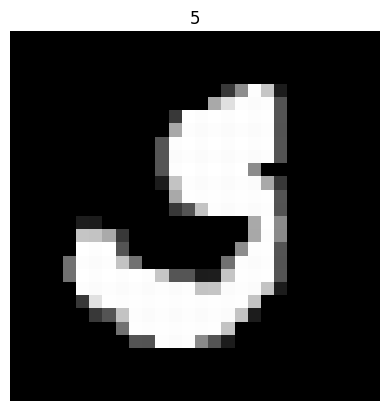

In [5]:
def display_img(i):
    img = x_train.iloc[i].values.reshape((28,28))
    plt.imshow(#x_train[i],
            img,
            cmap = 'gray')
    plt.title(y_train[i])   #prints number shown in the image
    plt.axis('off')

display_img(3694) #diplays the image at index i in train.csv

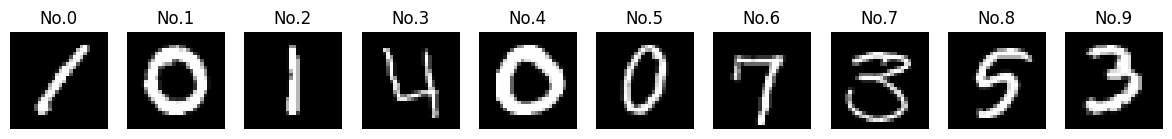

In [6]:
plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(20, 20, i+1)
    plt.title("No." + str(i))
    plt.axis('off')
    plt.imshow(train.iloc[:,1:].iloc[i].values.reshape(28,28),cmap='gray')

Creating Model


In [7]:
# classifier = SVC(kernel = "linear", random_state = 6)
# classifier.fit(x_train, y_train)
# joblib.dump(classifier, "models/svc_model")

In [8]:
model_load = joblib.load("models/svc_model")
prediction=model_load.predict(x_test)

Accuracy = 96.77551020408163


In [16]:
print(metrics.classification_report(y_true=y_test, y_pred=prediction))
print(f"Accuracy = {metrics.accuracy_score(y_test,prediction)*100}")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1451
           1       0.98      0.99      0.99      1624
           2       0.96      0.97      0.97      1444
           3       0.94      0.96      0.95      1543
           4       0.96      0.98      0.97      1405
           5       0.96      0.95      0.95      1351
           6       0.98      0.98      0.98      1411
           7       0.97      0.97      0.97      1565
           8       0.97      0.94      0.96      1399
           9       0.97      0.94      0.96      1507

    accuracy                           0.97     14700
   macro avg       0.97      0.97      0.97     14700
weighted avg       0.97      0.97      0.97     14700

Accuracy = 96.77551020408163


The answer is 2


c:\Users\Vanish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Vanish\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


(-0.5, 27.5, 27.5, -0.5)

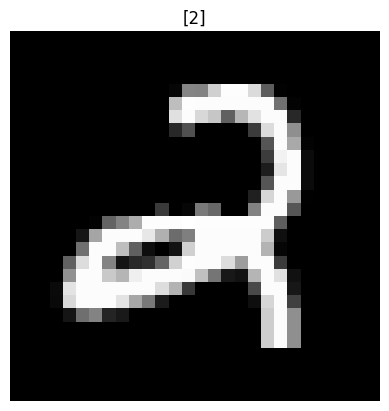

In [12]:
from random import randrange
img = randrange(42001)

prediction_sample = model_load.predict(x_t[[img]])

print("The answer is",int(prediction_sample))

plt.imshow(x_t[[img]].reshape(28,28),cmap='gray')
plt.title(prediction_sample)
plt.axis('off')